# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The *Smartcab* remains stationary throughtout the simulation. Positive rewards are received when stopping is the correct action (at a red light). Conversely, negative rewrads are received when stopping is incorrect (green light and no oncoming trasffic). Since the *Smartcab* does not move during the simulation, it is effectively receiving positive rewards whenver light is red and negative rewards whenever light is green. The rewards are slightly randomized, and positive rewards (around 1 to 3) are smaller than negative rewards (around -4 to -6).

In addition, no negative rewards are given for failing to arrive at destination, as there is no deadline enforced. 




### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

* agent.py simulation flags
   1. the grid_size flag changes the height and width of the road network grid and consequently the number of roads and intersections
   1. the num_dummies flag changes how many dummy agents (other cabs that follow traffic rules) are present other than the learning agent
   1. enforce_deadline changes whether a deadline is enforced on the learning agent. Not arriving at destination by deadline means a failure.
   
* environment.py
   * the *act* function is called when an agent performs an action. Positive reward is given for correct action while negative reward is given for traffic violations or accident-causing actions.
   
* simulation.py
   * *render_text* reports the simulation result in plain-text format to a console. *render* reports the simulation result to a *pygame* GUI window.
   

* planner.py
   * *next_waypoint()* considers East-West direction first. 


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


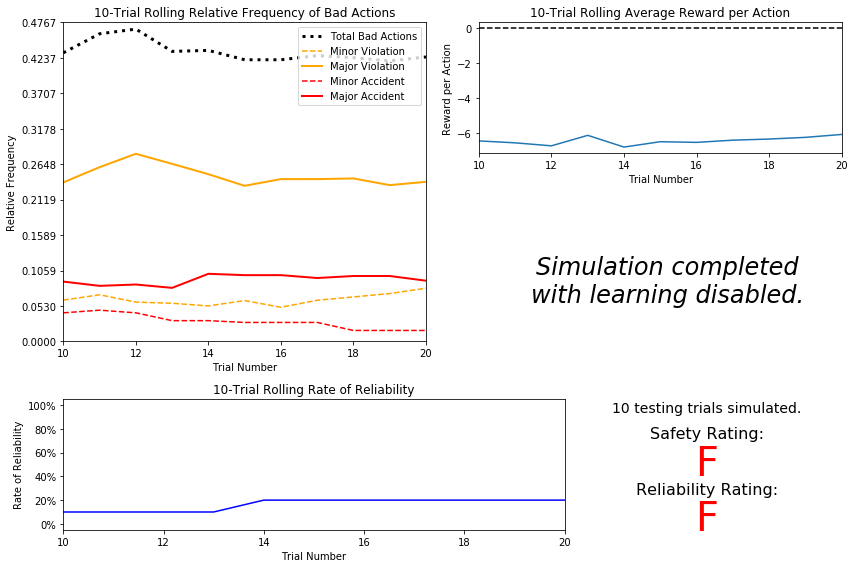

In [6]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

* The agent is frequently making bad decisions for around 46% of the time. Among all actions, minor accidents happen around 2% of the time and major accidents happen around 10% of the time. Thus among bad decisions, about one-quarter of those cause accidents.
* The reliability rating is *F*, the lowest poossible. This makes total sense as the agent is driving randomly.
* The agent on average gets a very negative reward (-6) per action. This does suggests a heavy penalty.
* The results do not change sigificantly over trials. This is expected as there is no learning and everything is random. 
* This *smartcab* is extremely unsafe and unreliable. It frequently violates traffic rules and causes accidients. On top of that, it is going in random directions and not heading towards destination. In fact, both the reliablity an safety reatings are the lowest possible *F* grade.

Note that if the simulation is re-run many times, the general conclusions above will still hold even the exact numbers  vary. In particular, the reward per action will remain very negative and safety/reliabiliity ratings remain *F* grade.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

All the features above are relevant except *deadline* and *right*.
* *waypoint* is needed for efficiency, as driving in the correct direction to destination would result in earlier arrival time.
* most of the *inputs* data are needed for safety
  * *light* is the most important determinant for rights of way. Not following the rights-of-way is traffic rule violation and can easy cause accidient. 
  * knowing *light* alone is not sufficient for safe driving. We also need to know in which directions traffic on our left/oncoming are going. In particular
  * On green light
     * we can go forward and right regardless
     * we can only go left if oncoming traffic is turning right.
  * On red light
     * we should never go forward/left
     * we can go right if no traffic from our left is going forward
  * It is interesting to note that we need not know which direction right traffic is heading, assuming they are driving correctly.    
  * Note that in the above we are able to simplify *safety driving logic* by exploiting the assumption that other drives are driving correctly. (The reward policy also reflects this - we are not penalized for accidents caused by another driver as long as we obey rights-of-way) If this assumption doesn't hold, we need to be more vigiliant of traffic in all directions, e.g. on green light going forward we should watch for cross traffic from the left who runs red light.
* *deadline* is not needed since we should place safety and correct driving above deadline. In other words, since safety trumps efficiency, the optimal driving is heading in the right direction *while driving safe and correct*. The *inputs* above are sufficient for that purpose. 
   * Note that if we were to solely maximize the reward, there can be scenarios where it is optimal to drive unsafe (e.g. running a red light) in order to meet the deadline.
   
In conclusion
* By default, I would exclude *deadline* and *right* from the features.
  * In other words, feature set is *waypoint*, *light*, *left* and *oncoming*
  * Experiment with adding back *right* - this should not have any effect
  * Experiment with adding back *deadline* - this may lead to higher rewards overall, by increasing efficiency/reliablity at the expense of safety.
  
post-implementation notes:
  * I found that *right* is indeed not needed, adding it would degrade performance as it increases the state space size by 4 fold.
  * Adding *deadline* increases the state space even more significantly (~20 fold) and causes serious performance degrade.
   

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

In [38]:
# https://math.stackexchange.com/questions/983371/number-of-samples-with-replacement-to-reach-expected-coverage-of-population-unde
#n=1174 samples would achieve E[#state_sampled/#state_space_size] >= P
#where P=0.9999 and N=128
import math
P = 0.9999
N = 128
n = math.log(1-P)/math.log(1. - 1./N)
print(n)

1174.31237757


**Answer:**

My feature set is *waypoint*, *light*, *left* and *oncoming*, which has 4 x 2 x 4 x 4 = 128 combination of states.

From the calculation above, approximatley 1174 random samples would achieve 99.99% coverage. Given that each simulation trial would cover around 20 samples, approximately 60 trials (where epsilon = 1) should give almost complete coverage of the state space.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

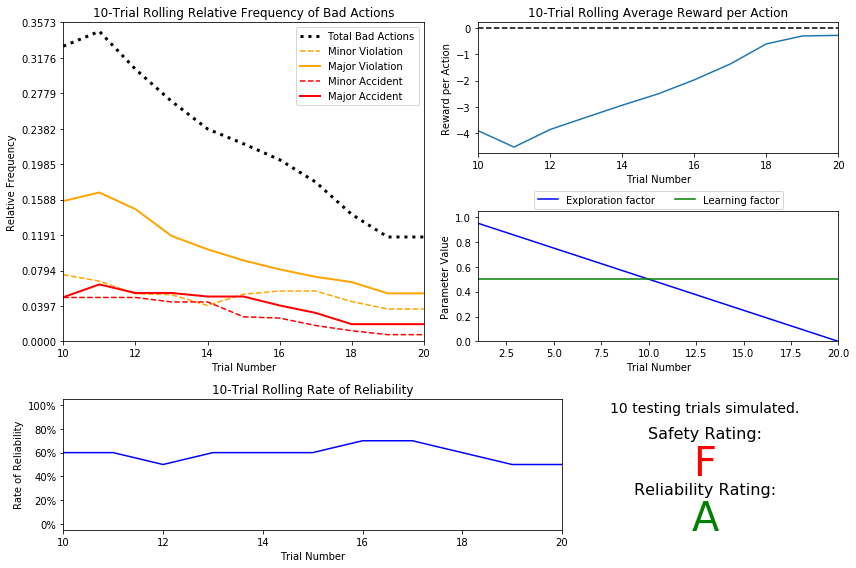

In [53]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

Compared with the random-acting agent in **Question 3**, the Q-learnint agent has significant improvements:
   * As more trial is done, performance steadily improves as all error measures (bad actions, major/minor accident, major/minor violation) see fewer occurences
   * Similarly, the reward per action measure steadily increases with number of trial.
   * Safety rating is F and Reliability rating is A compared to F and F for the random-acting agent.

The linear decaying function for the exploration factor is accurately represented in the parameters panel.

The provided code require at least 20 training before testing. This seems reasonable as there is no point in starting training with little training. In using the default linear decay for the exploration factor (start from 1 with stride of -0.05), the factor would also reach the default epsilon tolerance of 0.05 after 20 trials. Thus these default settings are consistent and reasonable.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

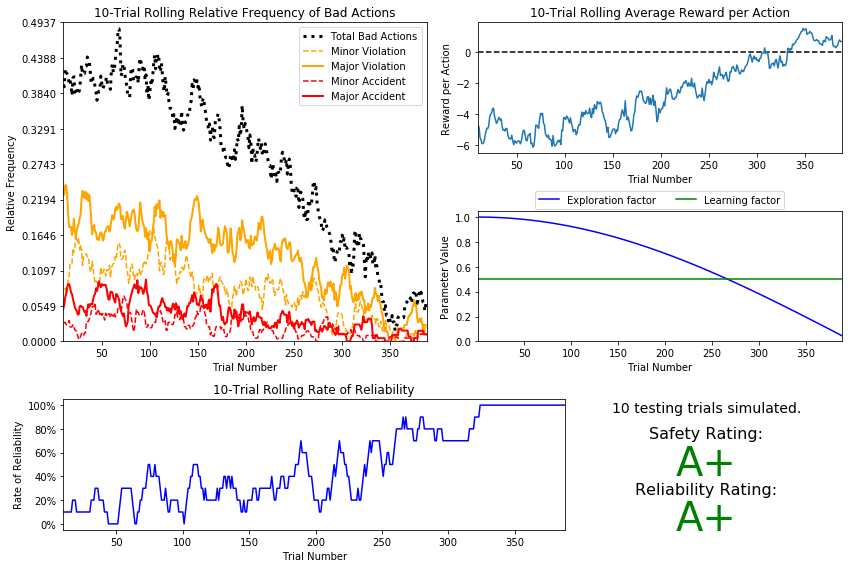

In [51]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

* a cosine function is used to replace the linear funcction for decaying epsilon
  * the cosine shape decays slowly in early trial rounds and gradually speed up
  * this has the benefit of increasing exploration in early stage so the learning agent can visit the state space with higher coverage
  * the cosine decay function is observed to result in fewer zero Q values (unvisited states during training) than the linear decay function (for the same number of trials)
* Approximately 400 training trials were needed for my agent before training
  * From the 10-trial rolling rate of reliability has converged to 100% after around 300 trials 
  * When I tried with 200 trials result was worse due to under-training
* I used the default epsilon-tolerance of 0.05 and alpha of 0.5. 
  * I hypothesize that the epsilon decay has the most significant influence in training efficiency. Since I am able to obtain A+ ratings for both safety/reliablity with reasonable number of trials, I did not bother to change these default values.
* Sigificant improvements are seen compared to the default Q-learner from previous section. The error occurences are much smaller, reward per action much higher and safety/reliablity has achieved best grade.
* Given the safety/reliablity ratings of A+ and the converegence of reliability, I think my driving agent has succesfully learned a desired policy and I am satisfied with the result.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

My state dictionary is based on the following four input
  * *waypoint*. possible values are *forward*, *left* and *right*
  * *light*. possible values are *green* and *red*
  * (traffic from the ) *left*. possible values are *None*, *forward*, *left* and *right*
  * *oncoming* (traffic). possible values are *None*, *forward*, *left* and *right*
  
The optimal policy is as follows:
  * On green light
     * if waypoint is right: go right
        * reason: this can never cause accident and will bring us closer to destination
     * if waypoint is forward: go forward
        * reason: this can never cause accient and will bring us closer to destination
     * if waypoint is left:
        * go left if oncoming traffic is None or turning right
           * reason: safe to go left and this brings us closer to destination
        * otherwise go forward
           * reason: going left would cause accident, stopping would be traffic violation, going forward is closer to the waypoint than going right
  * On red light
     * if waypoint is forward: stop
         * reason: without knowing whether destination is on our left or right, best to just stay put and obey traffic rule. (if we know destination is on or right, turning right when safe can be a better option)
     * if waypoint is left: stop
         * reason: going forward/right violates traffic rule. Going right brings us away from destination
     * if waypoint is right:
        * stop if left traffic is going forward
           * reason: not safe to go right
        * otherwise go right
           * reason: safe to go right and this brings us closer to destination

* Most of the Q-values are consistent with the hand-crafted optimal policy spelt out above, with a few exceptions.
* Examples where Q-values give optimal policy:
   * waypoint=right, light=green, oncoming=forward, left=right
      * None: -2.72, forward: 0.23, right: 2.12, left: 0.0
      * the Q-optimal policy is go right since it has highest Q-value
   * waypoint=left, light=green, oncoming=forward, left=left
      * None: -4.45, forward: 0.49, right: 0.31, left: -19.68
      * the Q-optimal policy is go forward since it has highest Q-value
   * waypoint=right, light=red, oncoming=forward, left=None
      * None: 0.41, forward: -9.59, right: 2.14, left: -17.35
      * the Q-optimal policy is go right     
* Examples where Q-values give sub-optimal policy:
   * waypoint=right, light=green, oncoming=left, left=right
      * None: -3.93, forward: 0.16, right: 0.00, left: 0.74
      * the Q-optimal policy is go left
      * The optimal policy should be go right instread
      * The suboptimality is likely because during training the agent never had a chance to go right (recall we initilaize Q values to zero) and discover that it is better than the oother options. 
     

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

Including future rewards in the Q-value function is a technique for tackling the *credit assignment problem*, i.e. when an action affects the reward in the future but the effect cannot be taken into account immediately. For this project, the *credit assignment problem* is very minor or non-existent because of the following set-up:

1. the Smartcab has a *waypoint* state that directly points to the destination:
   * simply following the *waypoint* state (while obeying traffic rules) leads to the optimal policy
   * in other words, there is no delay in knowing whether the immediate action is good or not
   * following the *waypoint* is also immediately rewarded
   * thus it is sufficient to optimize for the immediate reward to achieve long-term optimality
1. the Smartcab is given only local state but not global state
   * the smartcabs knows the immediate next direction to go (*waypoint*), but has no idea beyond that about where the next destination is, in particular, it doesn't know the coordinates of the destination, its own coordination or its disance to the destination
   * because of this limitation to local state, the transition from s_{t} to s_{t+1} can look very random and doesn't relate to the goal of reaching final destination
1. there is no reward/penalty for reaching or not reaching the destination at the end
   * without this information, using future rewards would not help guide the smartcab to the destination



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.